In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import statistics as st

In [ ]:
#mean,median mode
df=sns.load_dataset('tips')
print(df)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
np.mean(df['total_bill'])

19.78594262295082

In [ ]:
np.median(df['total_bill'])

17.795

In [ ]:
st.mode(df['total_bill'])

13.42

<Axes: ylabel='total_bill'>

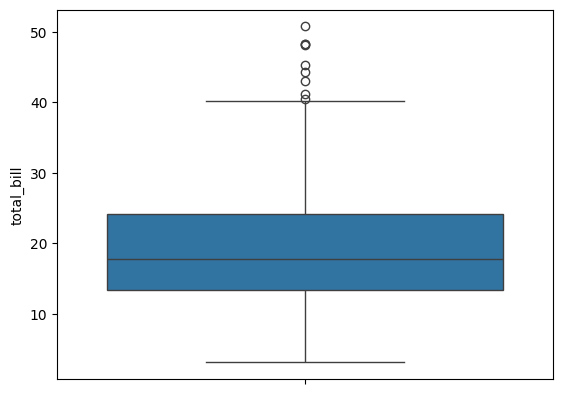

In [ ]:
sns.boxplot(df['total_bill'])

<Axes: xlabel='total_bill', ylabel='Count'>

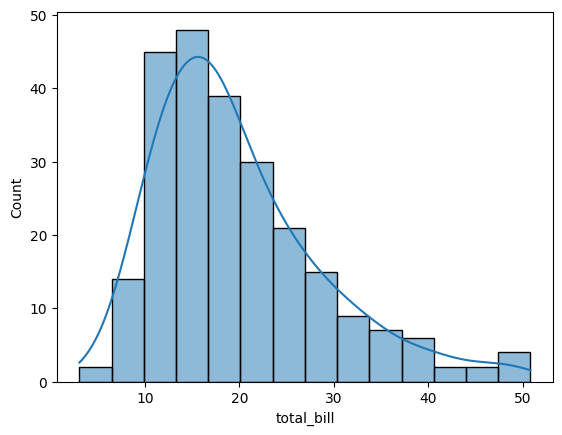

In [ ]:
sns.histplot(df['total_bill'],kde=True) #kde=pdf function

In [ ]:
df1=sns.load_dataset('iris')
print(df1)


     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [ ]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_width', ylabel='Count'>

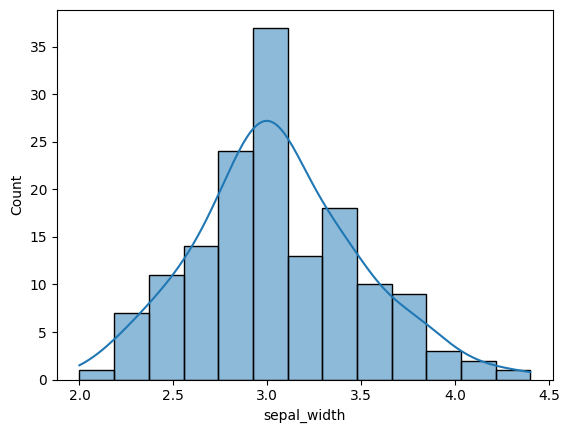

In [ ]:
sns.histplot(df1['sepal_width'],kde=True)# gaussian distribution

<Axes: xlabel='count', ylabel='species'>

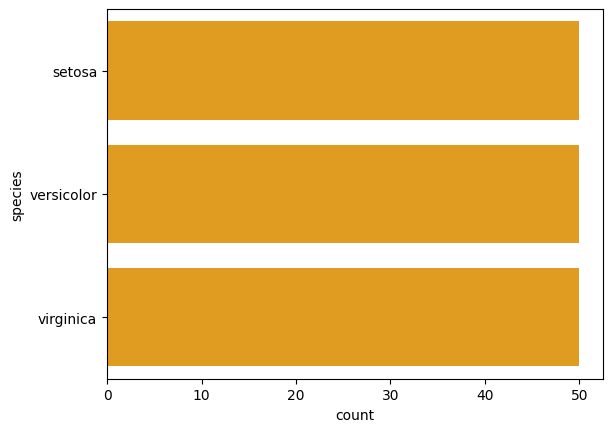

In [ ]:
sns.countplot(df1['species'],color='orange')


In [ ]:
np.percentile(df1['sepal_length'],[25,75,99.7])

array([5.1   , 6.4   , 7.8106])

In [ ]:
###Outlier
dataset=[11,10,12,14,12,15,14,13,15,102,12,14,17,19,107,10,13,12,14,12,108,12,11,14,13,15,12,10,14,13,15,10]

(array([29.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([ 10. ,  19.8,  29.6,  39.4,  49.2,  59. ,  68.8,  78.6,  88.4,
         98.2, 108. ]),
 <BarContainer object of 10 artists>)

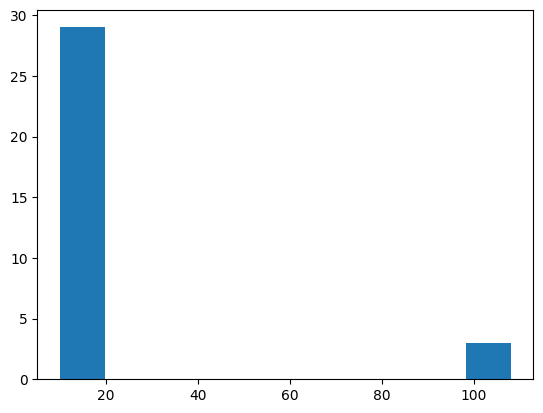

In [ ]:
plt.hist(dataset)

In [ ]:
outliers=[]
def detect_outliers(data):
    threshold=3     # beyond 3rd standard deviation
    mean=np.mean(data)
    std=np.std(data)
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [ ]:
detect_outliers(dataset)


[107, 108]

# IQR
1 Sort the data
2 Calculate Q1 ,Q3
3 IQR (Q3-Q1)
4 Find the lower fence (q1-1.5(IQR))
5 Find the upper fence (q3+1.5(IQR))

In [ ]:
# IQR
dataset=sorted(dataset)
print(dataset)

[10, 10, 10, 10, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 17, 19, 102, 107, 108]


In [ ]:
q1,q3=np.percentile(dataset,[25,75])
print(q1,q3)

12.0 15.0


In [ ]:
iqr=q3-q1
print(iqr)

3.0


In [ ]:
# compute lower and upper fence
lower_fence=q1-(1.5*(q3-q1))
upper_fence=q3+(1.5*(q3-q1))
print(lower_fence,upper_fence)

7.5 19.5


<Axes: >

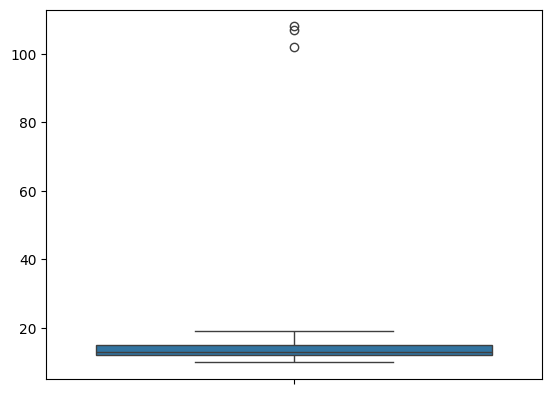

In [ ]:
sns.boxplot(dataset)


In [ ]:
# Suppose the IQ in a certain population is normally distributed with a mean of u=100 and Standard of sigma=15
# A researcher wants to know if a drug is affcted IQ levels so he recruits 20 patient to try  it and records their IQ levels
# The following code shows how to perform a one sample Z-test in python to determine if the new drug causes a significant difference on IQ levels

from statsmodels.stats.weightstats import ztest as ztest
# IQ level for 20 patient
data=[88,92,94,94,96,97,97 ,99,99, 125,102,102, 102,112,112,112,113,114,115]
ztest(data,value=100)

(1.5112193036696497, 0.1307325857728997)

In [1]:
# t-test
ages=[10,17,45,64,23,56,34,12,13,43,34,67,43,12,23,19,20,76,76,32,24,39,25,16,20,20,40]


In [2]:
import numpy as np
ages_mean=np.mean(ages)
print(ages_mean)

33.44444444444444


In [10]:
sample_size=10
age_sample=np.random.choice(ages,sample_size)
age_sample
print(age_sample)

[20 23 56 76 25 23 23 20 45 67]


In [11]:
np.mean(age_sample)

37.8

In [8]:
from scipy.stats import ttest_1samp


In [12]:
ttest_1samp(age_sample,33)

TtestResult(statistic=0.7069022672903862, pvalue=0.49752015434140395, df=9)

In [13]:
ttest_1samp(age_sample,30)

TtestResult(statistic=1.1487161843468778, pvalue=0.280285966213078, df=9)

In [21]:
#consider another example
#ages of college student(population)
#1 class student mean of all ages
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
np.random.seed(6)
school_ages=stats.poisson.rvs(loc=18,mu=35,size=1500)
classA_ages=stats.poisson.rvs(loc=18,mu=30,size=60)

In [15]:
school_ages

array([62, 59, 44, ..., 45, 52, 50])

In [16]:
classA_ages

array([52, 46, 40, 40, 47, 50, 51, 45, 44, 52, 46, 53, 43, 44, 51, 50, 54,
       42, 54, 45, 61, 53, 49, 46, 47, 41, 45, 51, 43, 45, 48, 50, 40, 52,
       44, 55, 54, 40, 45, 46, 54, 42, 46, 35, 51, 51, 46, 48, 47, 35, 52,
       52, 39, 44, 48, 40, 42, 46, 47, 45])

In [19]:
classA_ages.mean()

46.9

In [20]:
ttest_1samp(classA_ages,school_ages.mean())

TtestResult(statistic=-9.604796510704091, pvalue=1.139027071016194e-13, df=59)

In [22]:
ttest_1samp(classA_ages,popmean=school_ages.mean())

TtestResult(statistic=-9.604796510704091, pvalue=1.139027071016194e-13, df=59)